In [1]:
import os, sys, re, datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns

try:
    scriptdir
except NameError:
    print('No script directory')
    scriptdir = !pwd
    
now = datetime.datetime.now()
today = str(now.year)+'-'+str(now.month)+'-'+str(now.day)

outputPath = scriptdir[0]+'/NHP_outputFiles'
masterPath =  scriptdir[0]+'/NHP_masterFiles'
infectionDataPath=masterPath+'/AnimalDataFromAnalysisII.csv'

#loading data with experiment and infection info
infectionDf=pd.read_csv(infectionDataPath, sep=',', index_col=0)


No script directory


In [2]:
### shared parameters for plotting

psize=3.5

#defining fonts
titlefont = {'fontname':'Arial', 'fontsize': 14, 'fontweight' : 'bold', 'verticalalignment': 'baseline','horizontalalignment': 'center'}
tickfont = {'fontname':'Arial', 'fontsize': 14, 'fontweight' : 'normal'}
labelfont = {'fontname':'Arial', 'fontsize': 14, 'fontweight' : 'bold'}

sns.set_context("paper", font_scale=1.6)
def formatPlot(tmpax, subdf):
    ##setting simpler titles
    [plt.setp(ax.texts, text="") for ax in tmpax.axes.flat] # remove the original texts                                         
    tmpax.set_titles(row_template = '{row_name}', col_template = '{col_name}')
    tmpax.fig.subplots_adjust(wspace=.2, hspace=.2)
      
    tmpax.set_axis_labels('mAb', 'titer')
    #tmpax.fig.suptitle('TestPlot') 
    
    #xmax=90#subdf.dpi.max()
    #xmin=subdf.dpi.min()
    ymax=110#subdf.value.max()+50
    ymin=-10
    xoffset=1.3
     
    #for ax, title in zip(plot.axes.flat, col_order):
    #    ax.set_title(title)
    #    ax.text(0.85, 0.85,'Text Here', fontsize=9) 
    i=0
    for row in tmpax.axes:
        for plot in row:
            plot.tick_params(axis='both', labelsize=tickfont['fontsize'], length=5, width=1)
            for tick in plot.get_xticklabels():
                tick.set_fontname(tickfont['fontname'])
                tick.set_fontweight(tickfont['fontweight'])
            for tick in plot.get_yticklabels():
                tick.set_fontname(tickfont['fontname'])
                tick.set_fontweight(tickfont['fontweight'])
            
            plot.set_title(plot.get_title('center'), **titlefont)
            plot.set_ylabel(plot.get_ylabel(), **labelfont)
            plot.set_xlabel(plot.get_xlabel(), **labelfont)
        
            plot.facecolor=(0,1,0,0.1)
           # plot.axhline(0, alpha=0.5, color='grey', ls=':')
           # plot.axhline(100, alpha=0.5, color='grey', ls=':')
            #plot.set_xscale('log')
            #plot.set_yscale('log')
            #plot.set_xlim([xmin/xoffset, xmax*xoffset])
            plot.set_ylim([-0, 1000])
            #plot.set_ylim([ymin, ymax])
            plot.spines['right'].set_visible(True)
            plot.spines['right'].set_linewidth(1)
            plot.spines['left'].set_visible(True)
            plot.spines['left'].set_linewidth(1)
            plot.spines['top'].set_visible(True)
            plot.spines['top'].set_linewidth(1)
            plot.spines['bottom'].set_visible(True)
            plot.spines['bottom'].set_linewidth(1)

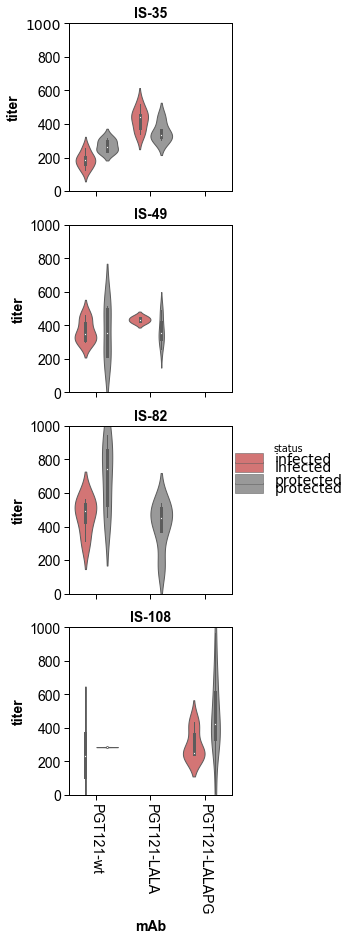

In [3]:

##Suppl. Figure 1B

neutDataPath = scriptdir[0]+'/NHP_masterfiles/191228_neut_long_191127vs191212.csv'
neutDataPath
neutDf = pd.read_csv(neutDataPath, sep=',')

##parsing numbers
header = ['id','titer', 'fit', 'assayDate']#['dpi', 'titer']

neutDf=pd.merge(neutDf, infectionDf, on='id', how='left')

g=sns.catplot(x="mab", y="titer", data=neutDf[neutDf['mab'] != "DEN3-wt"], row='experiment', hue='status',
              palette={'infected':'#E36565', 'protected':'#999999'},
              height= 3,aspect=1, 
              s=12, alpha = 0.6,
              linewidth=1, kind='violin')

g.set_xticklabels(rotation=-90)
g.add_legend()
formatPlot(g, neutDf)
#plt.gca().set_xlim(0, 20)
neutDf[neutDf['mab'] != "DEN3-wt"].to_clipboard()

svgPath=outputPath+'/'+today+'_d0_Neut_merged.svg'
pdfPath=outputPath+'/'+today+'_d0_Neut_merged.pdf'

#print(svgPath)
g.savefig(svgPath)
g.savefig(pdfPath)

